# Lab 6 Data Analysis
Group: IP-91

Var: 6

Students:
- Geleshko D.
- Vlasov A.

## Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Config

In [2]:
np.random.seed(6)

pd.set_option("display.max_columns", None)
pd.options.display.float_format ="{:,.3f}".format

# Load Data

In [3]:
df = pd.read_html("../data/version6.html", index_col=0, parse_dates=["date"])[0]
df

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000,84.500,0.000,"1,015.667"
1,2013-01-02,7.400,92.000,2.980,"1,017.800"
2,2013-01-03,7.167,87.000,4.633,"1,018.667"
3,2013-01-04,8.667,71.333,1.233,"1,017.167"
4,2013-01-05,6.000,86.833,3.700,"1,016.500"
...,...,...,...,...,...
1467,2016-12-28,17.217,68.043,3.548,"1,015.565"
1468,2016-12-29,15.238,87.857,6.000,"1,016.905"
1469,2016-12-30,14.095,89.667,6.267,"1,017.905"
1470,2016-12-31,15.053,87.000,7.325,"1,016.100"


In [4]:
df.rename(columns={"meantemp":"temp", "meanpressure":"pressure"}, inplace=True)
df

,date,temp,humidity,wind_speed,pressure
0,2013-01-01,10.000,84.500,0.000,"1,015.667"
1,2013-01-02,7.400,92.000,2.980,"1,017.800"
2,2013-01-03,7.167,87.000,4.633,"1,018.667"
3,2013-01-04,8.667,71.333,1.233,"1,017.167"
4,2013-01-05,6.000,86.833,3.700,"1,016.500"
...,...,...,...,...,...
1467,2016-12-28,17.217,68.043,3.548,"1,015.565"
1468,2016-12-29,15.238,87.857,6.000,"1,016.905"
1469,2016-12-30,14.095,89.667,6.267,"1,017.905"
1470,2016-12-31,15.053,87.000,7.325,"1,016.100"


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1472 entries, 0 to 1471
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1472 non-null   datetime64[ns]
 1   temp        1469 non-null   float64       
 2   humidity    1470 non-null   float64       
 3   wind_speed  1467 non-null   float64       
 4   pressure    1470 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 69.0 KB


# Outliers detection and removal

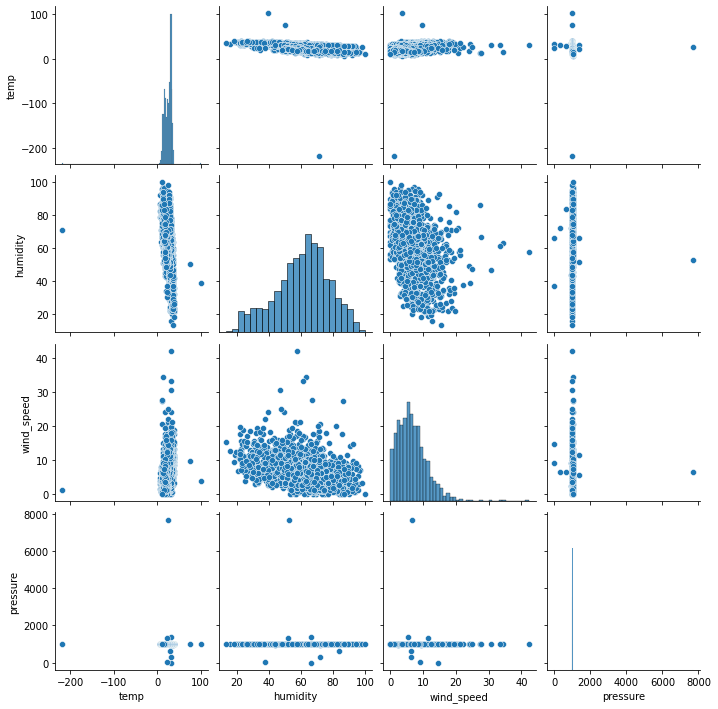

In [6]:
sns.pairplot(df)
plt.show()

In [7]:
df_date = df.pop("date")
df

,temp,humidity,wind_speed,pressure
0,10.000,84.500,0.000,"1,015.667"
1,7.400,92.000,2.980,"1,017.800"
2,7.167,87.000,4.633,"1,018.667"
3,8.667,71.333,1.233,"1,017.167"
4,6.000,86.833,3.700,"1,016.500"
...,...,...,...,...
1467,17.217,68.043,3.548,"1,015.565"
1468,15.238,87.857,6.000,"1,016.905"
1469,14.095,89.667,6.267,"1,017.905"
1470,15.053,87.000,7.325,"1,016.100"


## Values: temp

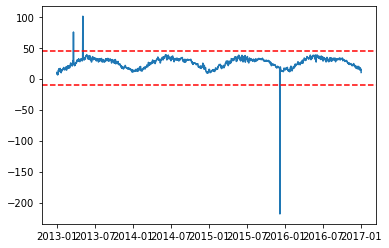

In [8]:
plt.plot(df_date, df["temp"])
plt.axhline(45, color="red", linestyle="--")
plt.axhline(-10, color="red", linestyle="--")
plt.show()

In [9]:
df["temp"].loc[(df["temp"] > 45)|(df["temp"] < -10)] = np.NaN

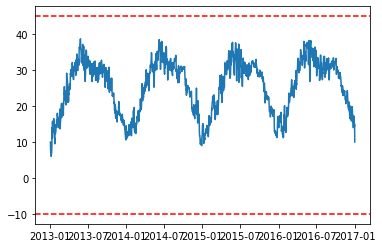

In [10]:
plt.plot(df_date, df["temp"])
plt.axhline(45, color="red", linestyle="--")
plt.axhline(-10, color="red", linestyle="--")
plt.show()

## Values: humidity

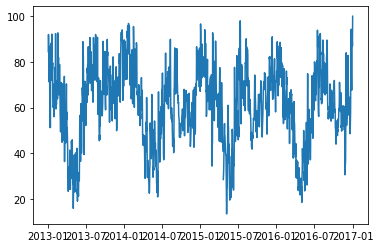

In [11]:
plt.plot(df_date, df["humidity"])
#plt.axhline(45, color="red", linestyle="--")
#plt.axhline(-10, color="red", linestyle="--")
plt.show()

## Values: wind_speed

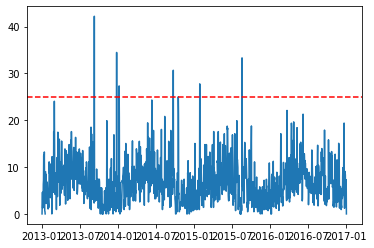

In [12]:
plt.plot(df_date, df["wind_speed"])
plt.axhline(25, color="red", linestyle="--")
plt.show()

In [13]:
df["wind_speed"].loc[df["wind_speed"] > 25] = 25

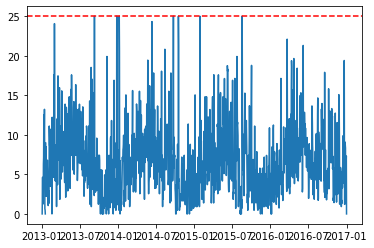

In [14]:
plt.plot(df_date, df["wind_speed"])
plt.axhline(25, color="red", linestyle="--")
plt.show()

## Values: pressure

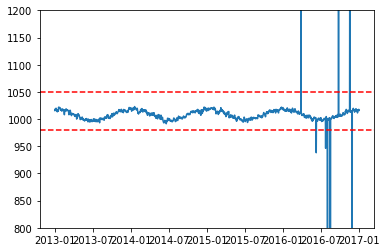

In [15]:
plt.plot(df_date, df["pressure"])
plt.axhline(1050, color="red", linestyle="--")
plt.axhline(980, color="red", linestyle="--")
plt.ylim(800, 1200)
plt.show()

In [16]:
df["pressure"].loc[(df["pressure"] > 1050)|(df["pressure"] < 980)] = np.NaN

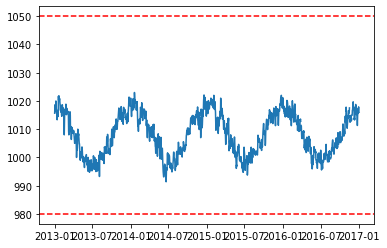

In [17]:
plt.plot(df_date, df["pressure"])
plt.axhline(1050, color="red", linestyle="--")
plt.axhline(980, color="red", linestyle="--")
plt.show()

# Values restoration

In [18]:
df.isna().sum()

temp           6
humidity       2
wind_speed     5
pressure      11
dtype: int64

In [19]:
df.fillna(method="ffill", inplace=True)
df.isna().sum()

temp          0
humidity      0
wind_speed    0
pressure      0
dtype: int64

# Normalize

In [20]:
df_norm = (df.copy() - df.mean()) / df.std()

df_norm["date"] = df_date
df_norm

,temp,humidity,wind_speed,pressure,date
0,-2.114,1.412,-1.541,1.001,2013-01-01
1,-2.468,1.859,-0.862,1.288,2013-01-02
2,-2.500,1.561,-0.486,1.404,2013-01-03
3,-2.296,0.626,-1.260,1.203,2013-01-04
4,-2.659,1.551,-0.698,1.113,2013-01-05
...,...,...,...,...,...
1467,-1.131,0.430,-0.733,0.988,2016-12-28
1468,-1.401,1.612,-0.174,1.168,2016-12-29
1469,-1.556,1.720,-0.114,1.302,2016-12-30
1470,-1.426,1.561,0.127,1.059,2016-12-31


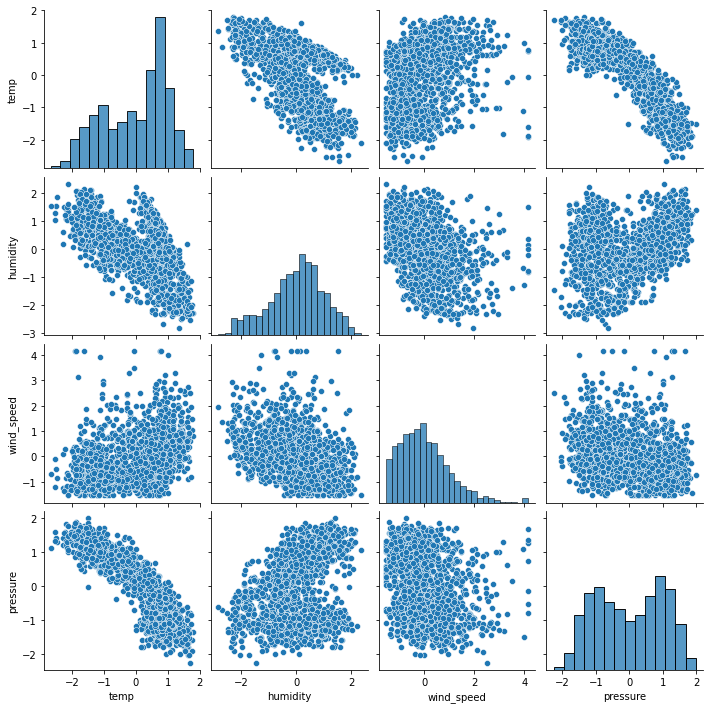

In [21]:
sns.pairplot(df_norm)
plt.show()